# Input Use Cases

* `inputs.get()` - return value that matches key, default value if there's no match, fail if there's more than one.
* `inputs.getone()` - return value that matches key, fail if there's no match or more than one.
* `inputs.getall()` - return sequence of values that match key, empty sequence otherwise.

DEBUG:graphcat.common:Task D updating.
INFO:graphcat.common:Task D executing. Inputs: {0, 1, 1}
DEBUG:graphcat.common:Task A updating.
INFO:graphcat.common:Task A executing. Inputs: {}
INFO:graphcat.common:Task A finished. Output: 1
DEBUG:graphcat.common:Task B updating.
INFO:graphcat.common:Task B executing. Inputs: {}
INFO:graphcat.common:Task B finished. Output: 2
DEBUG:graphcat.common:Task C updating.
INFO:graphcat.common:Task C executing. Inputs: {}
INFO:graphcat.common:Task C finished. Output: 3
INFO:graphcat.common:Task D finished. Output: 6


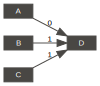

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat
import graphcat.notebook

def test(graph, name, inputs):
    return sum([value() for value in inputs.values()])

try:
    graph = graphcat.DynamicGraph()
    logger = graphcat.Logger(graph)
    graph.add_task("A", graphcat.constant(1))
    graph.add_task("B", graphcat.constant(2))
    graph.add_task("C", graphcat.constant(3))
    graph.add_task("D", test)
    graph.add_links("A", ("D", 0))
    graph.add_links("B", ("D", 1))
    graph.add_links("C", ("D", 1))
    graph.output("D")
except Exception as e:
    logging.error(f"Uncaught exception: {e!r}")

graphcat.notebook.display(graph)